## Color Feature Extraction : Temporal Analysis for Evolution of Web Design 




Log:
ankswarn@iu.edu
1. K mean quantization .. done 
2. Local region quantization.. done

Need to be done

Magic Parameters :
* bin count of HSV
* Region of perspective 
* Final run and export

Code starts from here

In [1]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import argparse#May be

In [132]:
cv2.__version__

'3.4.0'

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
os.chdir('E://Study//CV//images-227/')

In [4]:
feature_data= pd.DataFrame(columns=['Website','Year','Month'])

### Approach I : K- mean clustering quantization 

In [5]:
def quantize_(img_name, clt, cluster_count =16):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    pixel = np.reshape(img,(img.shape[0] * img.shape[1],3))#resize
    labels = clt.fit_predict(pixel)
    feature_ = clt.cluster_centers_.flatten()
    return feature_

In [6]:
clt = MiniBatchKMeans(n_clusters=10)

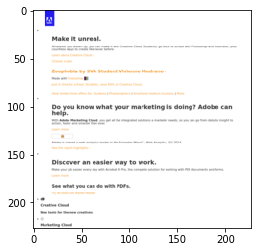

In [8]:
img = cv2.imread('20140901002235.png')
(h, w) = img.shape[:2]
plt.imshow(img)

In [9]:
img = cv2.imread('20140901002235.png')
(h, w) = img.shape[:2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
pixel = np.reshape(img,(img.shape[0] * img.shape[1],3))#resize
clt = MiniBatchKMeans(n_clusters=10)
labels = clt.fit_predict(pixel)
quant = clt.cluster_centers_.astype("uint8")[labels]

In [10]:
quant

array([[254, 127, 127],
       [254, 127, 127],
       [254, 127, 127],
       ..., 
       [254, 127, 127],
       [254, 127, 127],
       [254, 127, 127]], dtype=uint8)

In [11]:
quant = quant.reshape((h, w, 3))
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)

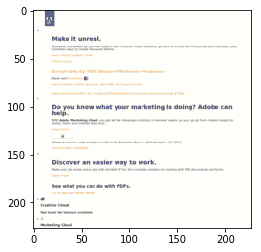

In [12]:
plt.imshow(quant)

In [13]:
clt.cluster_centers_.flatten()

array([ 254.92260692,  127.99796334,  127.99253225,  177.21428571,
        126.35714286,  129.42857143,  214.69565217,  128.        ,
        128.        ,  241.91304348,  128.43478261,  128.08695652,
        118.47368421,  145.05263158,  138.63157895,  212.56666667,
        121.86666667,  105.03333333,  147.65      ,  130.6       ,
        129.15      ,  229.025     ,  127.8       ,  127.325     ,
        243.10714286,  125.71428571,  121.42857143,  196.66666667,
        128.        ,  128.        ])

In [14]:
quantize_(clt=clt,img_name='20140901002235.png',cluster_count=16)

array([ 254.96958372,  127.9989619 ,  127.99563999,  203.06278027,
        128.69506726,  128.23318386,  122.36842105,  138.60818713,
        134.09356725,  235.27272727,  126.75757576,  123.6010101 ,
        242.87804878,  128.04065041,  128.00813008,  250.17763158,
        127.92105263,  127.76315789,  216.55905512,  122.18897638,
        107.25984252,  178.1878453 ,  128.91160221,  126.93922652,
        244.29931973,  126.39455782,  123.44217687,  223.20212766,
        127.90957447,  128.2606383 ])

In [15]:
a2 = quantize_(clt=clt,img_name='20140901002235.png',cluster_count=20) # hit and trial method

### Approach II : Local feature extraction 

In [171]:
class ImageExtraction():
    def __init__(self):
        self.H_histsize = 16 #Bin Size for H
        self.S_histsize = 16 #Bin Size for H
        self.V_histsize = 16 #Bin Size for H
         #3 channel
    def extract(self, image):
        """
        image as rgb
        """
        #1.Convert into hsv
        img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
        feature =[]
        (h,w) = img.shape[:2]
        (cX,cY) = (int(0.5 * w),int(h * 0.5))
        #Segmnent into rectangle 
        segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h), (0, cX, cY, h)]
        #Elipse mask
        mask_elip =  np.zeros(image.shape[:2],np.uint8)
        (ax_X, ax_Y) = (int((w * 0.75) / 2), int((h * 0.75) / 2)) #Half of the size of the ellipse main axes.
        cv2.ellipse(mask_elip, (cX, cY), (ax_X, ax_Y), 0, 0, 360, 255, -1) #https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html   
        for (startX, endX, startY, endY) in segments:
            cor_mask = np.zeros(image.shape[:2],np.uint8)
            cor_mask[startX:endX,startY:endY] = 255
            cor_mask = cv2.subtract(cor_mask, mask_elip)
            feature.extend(self.calc_hist(image,cor_mask))
        feature.extend(self.calc_hist(image,mask_elip))
        return feature
        
    def calc_hist(self,image, mask):
        hist = cv2.calcHist([image],[0, 1, 2],mask,[self.H_histsize,self.S_histsize,self.V_histsize],[0, 180, 0, 256, 0, 256]) # H range [0,180]
        hist = cv2.normalize(hist,hist).flatten()
        return hist

Sample Example

In [193]:
img.shape

(227, 227, 3)

In [194]:
a = ImageExtraction()
h1  = a.extract(image=img)

In [195]:
len(h1)

20480

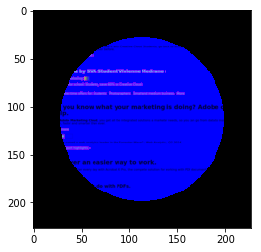

In [142]:
(h,w) = img.shape[:2]
cX = int(w/2)
cY = int(h/2)
mask_elip =  np.zeros(img.shape[:2],"uint8")
(ax_X, ax_Y) = (int((w * 0.75) / 2), int((h * 0.75) / 2)) #Half of the size of the ellipse main axes.
cv2.ellipse(mask_elip, (cX, cY), (ax_X, ax_Y), 0, 0, 360, 255, -1) 
masked_img = cv2.bitwise_and(img,img,mask = mask_elip)
plt.imshow(masked_img)

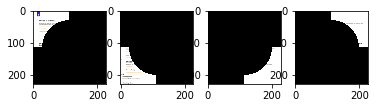

In [186]:
segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h), (0, cX, cY, h)]

#Elipse mask
mask_elip =  np.zeros(img.shape[:2],np.uint8)
(ax_X, ax_Y) = (int((w * 0.75) / 2), int((h * 0.75) / 2)) #Half of the size of the ellipse main axes.
cv2.ellipse(mask_elip, (cX, cY), (ax_X, ax_Y), 0, 0, 360, 255, -1) #https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html   
i=1
for (startX, endX, startY, endY) in segments:
    cor_mask = np.zeros(img.shape[:2],np.uint8)
    cor_mask[startX:endX,startY:endY] = 255
    cor_mask = cv2.subtract(cor_mask, mask_elip)
    masked_img = cv2.bitwise_and(img,img,mask = cor_mask)
    plt.subplot(1,4,i)
    plt.imshow(masked_img)
    i+=1
    

Create Feature Map

In [ ]:
year_final = []
month_final = []
website_final =[]
feature_final = []

a = ImageExtraction()
count=5

for website in os.listdir(os.getcwd()):
    web_dir = os.path.join(os.getcwd(),website)
    #print("[LOG] Working on ",website)
    count_img =0
    for img in os.listdir(web_dir):
        count_img = count_img+1
        img_ = os.path.join(os.getcwd(),website,img)
        img_ = img_.replace('\\','//') # for Windows adjustment 
        if(os.path.exists(img_)==-1):
            print("[ERROR] Error while reading")
        year = img[:4]
        month = img[4:6]
        img = cv2.imread(img_)
        feature = a.extract(image=img)
        year_final.append(year)
        month_final.append(month)
        website_final.append(website)
        feature_final.append(feature)
    #print("[LOG] Images Read: ",count_img)
dataSet = pd.DataFrame(feature_final)
dataSet['Year'] = year_final
dataSet['Month'] = month_final
dataSet['Website'] = website

In [240]:
dataSet.shape

(24174, 20483)

In [ ]:
dataSet.to_csv('Full20483_colorFeature.csv')

In [ ]:
dataSet.head()

,0,1,2,3,4,5,6,7,8,9,...,20473,20474,20475,20476,20477,20478,20479,Year,Month,Website
0,0.0,0.042120,0.406896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003,02,yum.com
1,0.0,0.044087,0.425893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003,02,yum.com
2,0.0,0.044087,0.425893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003,02,yum.com
3,0.0,0.044087,0.425893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003,03,yum.com
4,0.0,0.044087,0.425893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003,04,yum.com
